In [2]:
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

from env import get_db_url
import wrangle as wr
import explore as ex
import model as mo
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

α = .05

# Project Goals:

To create a viable predictive model based off of the 2017 Zillow tax valuations

## Description

It has become exceedingly important to be able to be able to identify valuable real estate, and properties are flying off the market at an exceptional rate because of the strong buyers market. By analyzing property data from select counties in California, I hope to create a predictive model that can better estimate high value properties on the market.


# Wrangle

In this step we aquire and clean the data, making it more useful for analysis.

## Acquire

### First we selected single family homes with transaction dates in 2017 using the Zillow SQL database

    SELECT 
        bedroomcnt AS bedrooms, 
        bathroomcnt AS bathrooms,
        calculatedfinishedsquarefeet AS sq_ft,
        taxvaluedollarcnt AS tax_value,
        yearbuilt AS year_built,
        lotsizesquarefeet AS lot_size,
        fips
    FROM
        properties_2017
       JOIN propertylandusetype using (propertylandusetypeid)
       JOIN predictions_2017 USING(parcelid)
    WHERE propertylandusedesc in ("Single Family Residential", 
                                "Inferred Single Family Residential")
       AND transactiondate LIKE "2017%%";
       
### total observations collected: 52,441

## Clean

- Dropped null and duplicate values
- Optimized data by converting select columns data types
- Encoded and renamed FIPS to further ease of use and modeling
- Removed outliers with a p-value of less than 0.001 using Mehalanobis distance

### Total observations after cleaning: 49,586

- 94.5% of my total data was left after cleaning, which I am comfortable with for my model


#### After acquiring and cleaning the data, the current data was placed into a .csv file for ease of use

### Data Dictionary:

   | Column/Feature | Description |
    |--- | --- |
    | __bathrooom__ | The number of bathrooms in the home. |\n
    | __bedrooms__ | The number of bedrooms in the home. |\n
    | __tax_value__ | The tax-assessed value of the home. <br> __Not__ the home's ultimate sale price. |\n
    | __sq_feet__ | The home's square footage. |\n
    | __year_built__ | The year the home was built. |\n
    | __fips__ | \"Federal Information Process System\" code, used to <br> identify zip codes in the U.S. |\n
    | __lot_size__ | The square footage of the lot on which <br> the home is built. |

In [3]:
df = wr.get_zillow_data()
df.head()

,bedrooms,bathrooms,sq_ft,tax_value,year_built,lot_size,LA,orange,ventura
0,4,3.5,3100,1023282,1998,4506,0,1,0
1,2,1.0,1465,464000,1967,12647,0,0,1
2,3,2.0,1243,564778,1962,8432,0,1,0
3,4,3.0,2376,145143,1970,13038,1,0,0
4,4,3.0,2962,773303,1950,63000,1,0,0


# Exploration & Visualization

## Key Questions:

>- Is there a significant relationship between bedrooms and home value?
>- Is there a significant relationship between bathrooms and home value?
>- Is there a significant relationship between lot size and home value?
>- Is there a significant relationship between square footage and home value?
>- Is there a significant relationship between year built and home value?

## Is there a significant relationship between bedrooms and home value?

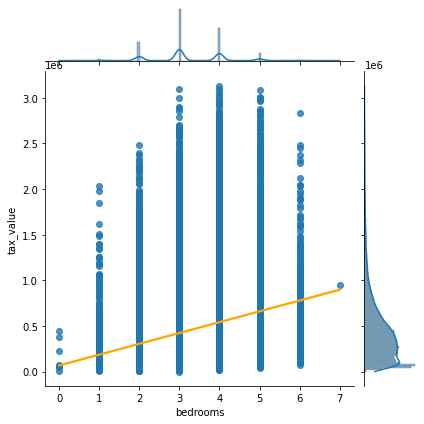

In [4]:
ex.joint('bedrooms', 'tax_value', df)

**Null Hypothesis:** There is no significant relationship between the number of bedrooms and the assessed value.

**Alternative Hypothesis:** There is a significant relationship between the number of bedrooms and the assessed value.

**Findings:** There is sufficient evidence to reject the null and assert that there is a significant relationship between bedrooms and the assessed value.
    
- The prefered number of bedrooms for valuation seems to be between 3 & 5

In [5]:
#Running a Pearson's R test to check the correlation between square footage and a home's value:
corr, p = stats.pearsonr(df.bedrooms, df.tax_value)

#Running a significance test to determine whether we can reject the null:
ex.significance_test(p)
print(f'The correlation coefficient for bedrooms and value is {round(corr, 2)}.')

Sufficient evidence -> Reject the null hypothesis.
The correlation coefficient for bedrooms and value is 0.26.


## Is there a significant relationship between bathrooms and home value?

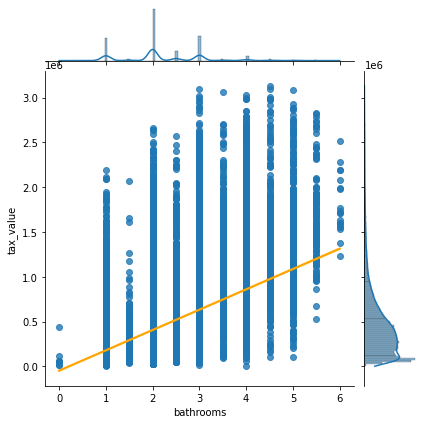

In [6]:
ex.joint('bathrooms', 'tax_value', df)

**Null Hypothesis:** There is no significant relationship between the number of bathrooms and the assessed value.

**Alternative Hypothesis:** There is a significant relationship between the number of bathrooms and the assessed value.

**Findings:** There is sufficient evidence to reject the null and assert that there is a significant relationship between bathrooms and the assessed value.

In [7]:
#Running a Pearson's R test to check the correlation between square footage and a home's value:
corr, p = stats.pearsonr(df.bathrooms, df.tax_value)

#Running a significance test to determine whether we can reject the null:
ex.significance_test(p)
print(f'The correlation coefficient for bathrooms and value is {round(corr, 2)}.')

Sufficient evidence -> Reject the null hypothesis.
The correlation coefficient for bathrooms and value is 0.5.


## Is there a significant relationship between lot size and home value?

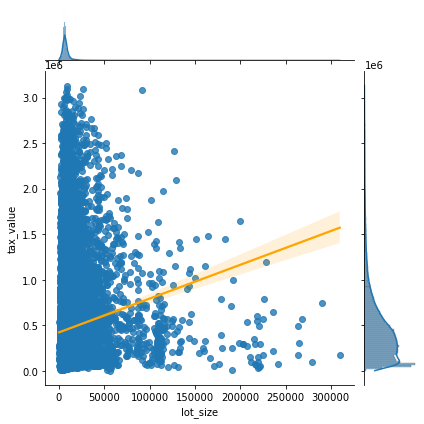

In [8]:
ex.joint('lot_size', 'tax_value', df)

**Null Hypothesis:** There is no significant relationship between the lot size and the assessed value.

**Alternative Hypothesis:** There is a significant relationship between the lot size and the assessed value.

**Findings:** There is sufficient evidence to reject the null and assert that there is a significant relationship between lot size and the assessed value.

In [9]:
#Running a Pearson's R test to check the correlation between square footage and a home's value:
corr, p = stats.pearsonr(df.lot_size, df.tax_value)

#Running a significance test to determine whether we can reject the null:
ex.significance_test(p)
print(f'The correlation coefficient for lot size and value is {round(corr, 2)}.')

Sufficient evidence -> Reject the null hypothesis.
The correlation coefficient for lot size and value is 0.11.


## Is there a significant relationship between square footage and home value?

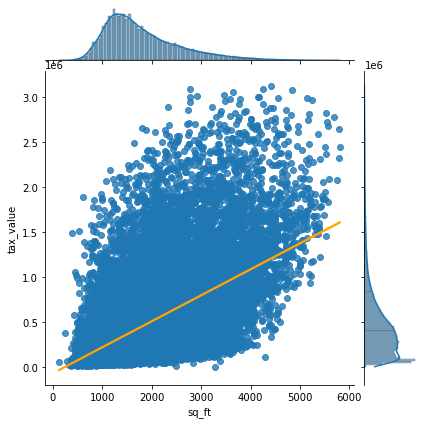

In [10]:
ex.joint('sq_ft', 'tax_value', df)

**Null Hypothesis:** There is no significant relationship between the square footage and the assessed value.

**Alternative Hypothesis:** There is a significant relationship between the square footage and the assessed value.

**Findings:** There is sufficient evidence to reject the null and assert that there is a significant relationship between square footage and the assessed value.

In [11]:
#Running a Pearson's R test to check the correlation between square footage and a home's value:
corr, p = stats.pearsonr(df.sq_ft, df.tax_value)

#Running a significance test to determine whether we can reject the null:
ex.significance_test(p)
print(f'The correlation coefficient for square footage and value is {round(corr, 2)}.')

Sufficient evidence -> Reject the null hypothesis.
The correlation coefficient for square footage and value is 0.58.


## Is there a significant relationship between year built and home value?

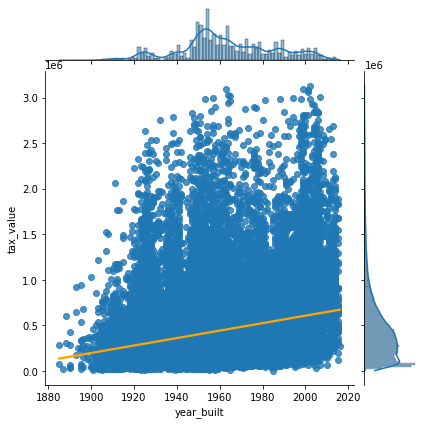

In [12]:
ex.joint('year_built', 'tax_value', df)

**Null Hypothesis:** There is no significant relationship between the year built and the assessed value.

**Alternative Hypothesis:** There is a significant relationship between the year built and the assessed value.

**Findings:** There is sufficient evidence to reject the null and assert that there is a significant relationship between year built and the assessed value.

In [13]:
#Running a Pearson's R test to check the correlation between square footage and a home's value:
corr, p = stats.pearsonr(df.year_built, df.tax_value)

#Running a significance test to determine whether we can reject the null:
ex.significance_test(p)
print(f'The correlation coefficient for year built and value is {round(corr, 2)}.')

Sufficient evidence -> Reject the null hypothesis.
The correlation coefficient for year built and value is 0.24.


## Key takeaway

### there is significant correlation with:
    
   | Feature | Correlation |
   |--|--|
   | Square feet | 0.58 |
   | Bathrooms | 0.50 |
   | Bedrooms | 0.26 |
   | Year Built | 0.24 |
   | Lot Size | 0.11

# Modeling

## Data prep for modeling

### Train Validate and Test split, X / Y sets, and scaling

In [14]:
# Creating Train, Validate, and Test sets
train, validate, test = mo.train_test_validate_split(df)

train	 n = 27767
test	 n = 9918
validate n = 11901


In [16]:
# Scaling the data
train_scaled, validate_scaled, test_scaled = mo.MM_scale_zillow(train, validate, test)

In [17]:
train_scaled.shape, validate_scaled.shape, test_scaled.shape

((27767, 9), (9918, 9), (11901, 9))

In [18]:
train_scaled.head()

,bedrooms,bathrooms,sq_ft,tax_value,year_built,lot_size,LA,orange,ventura
47983,0.500000,0.333333,0.172335,0.014476,0.549618,0.024584,1.0,0.0,0.0
41197,0.500000,0.333333,0.268370,0.153646,0.496183,0.018301,1.0,0.0,0.0
6789,0.333333,0.166667,0.097269,0.034492,0.274809,0.014754,1.0,0.0,0.0
35424,0.666667,0.416667,0.304317,0.196990,0.870229,0.007476,0.0,1.0,0.0
44266,0.666667,0.333333,0.282819,0.210718,0.519084,0.016652,1.0,0.0,0.0


In [19]:
#Splitting Train Set:
X_train = train_scaled.drop(columns = ['tax_value'])
y_train = train.drop(columns = X_train)

#Splitting Validate Set:
X_validate = validate_scaled.drop(columns = ['tax_value'])
y_validate = validate.drop(columns = X_validate)

#Splitting Test Set:
X_test = test_scaled.drop(columns = ['tax_value'])
y_test = test.drop(columns = X_test)

## Baseline model

In [20]:
#Adding mean baseline value to y_train:
y_train['baseline_mean'] = y_train.tax_value.mean()
#Adding mean baseline value to y_validate:
y_validate['baseline_mean'] = y_validate.tax_value.mean()

## Calculating Root Mean Squared Error 

In [21]:
# Creating an empty list for baseline results:
results = []

# Creating a dictionary of baseline mean values:
baseline_mean = {
    'model':'baseline_mean',
    'RMSE_train': mean_squared_error(y_train['tax_value'], y_train['baseline_mean']) ** 0.5,
    'RMSE_validate': mean_squared_error(y_validate['tax_value'], y_validate['baseline_mean'])** 0.5
}
#Appending baseline mean to results list:
results.append(baseline_mean)

#Creating a DataFrame from the list of result dictionaries:
results = pd.DataFrame(results)
results

,model,RMSE_train,RMSE_validate
0,baseline_mean,389831.755763,382873.659124


In [25]:
#Creating an empty list for the error calculations:
error = []

# Creating the Model Object:
lm = LinearRegression(normalize=True)

# Fitting the model to the value in the training set:
lm.fit(X_train, y_train.tax_value)

# Using OLS to make predictions on training set:
y_train['OLS_pred'] = lm.predict(X_train)

# Calculating the RMSE for train:
rmse_train = mean_squared_error(y_train.tax_value, y_train.OLS_pred)**(0.5)

# Using OLS to make predictions on validate set:
y_validate['OLS_pred'] = lm.predict(X_validate)

# Calculating the RMSE for validate:
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.OLS_pred)**(0.5)

#Creating a dictionary of ols_regression stats:
ols_regression = {
    'model':'ols_regression',
    'RMSE_train': mean_squared_error(y_train['tax_value'], y_train['OLS_pred'])**(0.5),
    'RMSE_validate': mean_squared_error(y_validate['tax_value'], y_validate['OLS_pred'])**(0.5)
}

#Adding the ols_regression stats to the empty list:
error.append(ols_regression)
#Converting the list to a DataFrame:
error = pd.DataFrame(error)

#Concatenating the RMSE DataFrames, ignoring index so it auto-updates in the final DataFrame:
results = pd.concat([results, error], ignore_index = True)
results

,model,RMSE_train,RMSE_validate
0,baseline_mean,389831.755763,382873.659124
1,ols_regression,310510.727308,304374.085637
